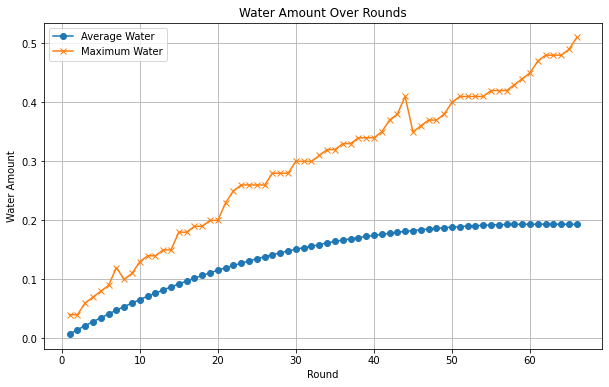

0.1932
0.5100000000000002
Ali wins!


In [12]:
import numpy as np
import random

import matplotlib.pyplot as plt

def play_game(n, m):

    cups = np.zeros(n)
    average_water = []
    max_water = []

    for _ in range(m):
        # Ali's turn, randomly distribute 1/2 a pint of water among the n cups.
        for _ in range(int(10/20 * 100)):
            cups[np.random.randint(0, n)] += 1/100

        # Beths turn, find two adjacent cups with the most combined water and empty them.
        max_combined = 0
        max_index = 0
        for i in range(n):
            combined = cups[i] + cups[(i + 1) % n]
            if combined > max_combined:
                max_combined = combined
                max_index = i
        cups[max_index] = 0
        cups[(max_index + 1) % n] = 0

        # Calculate and store the average water amount after this round.
        average_water.append(cups.sum() / n)
        max_water.append(cups.max())

        # Check if any cup has more than 1/2 a pint of water.
        if any(cup > 0.5 for cup in cups):
            break

    # Plotting the average amount of water per cup after each round.
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(average_water) + 1), average_water, marker='o', label = "Average Water")
    plt.plot(range(1, len(average_water) + 1), max_water, marker='x', label = "Maximum Water")
    plt.title('Water Amount Over Rounds')
    plt.xlabel('Round')
    plt.ylabel('Water Amount')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Printing the final average water and the maximum water in a cup in any round
    print(average_water[len(average_water) - 1])
    print(max(max_water))

    # Determine the winner based on the final state.
    if any(cup > 0.5 for cup in cups):
        return "Ali wins!"
    else:
        return "Beth wins!"
    
    
result = play_game(100, 50000)
print(result)

